In [1]:
import sklearn

**Bases de dados**

In [2]:
from sklearn import datasets

In [3]:
#iris = datasets.load_iris()
#print(iris)

In [4]:
import pandas as pd

diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade,resultado
0,6,148,72,35,0,33.6,0.627,50,testado_positivo
1,1,85,66,29,0,26.6,0.351,31,testado_negativo
2,8,183,64,0,0,23.3,0.672,32,testado_positivo
3,1,89,66,23,94,28.1,0.167,21,testado_negativo
4,0,137,40,35,168,43.1,2.288,33,testado_positivo


In [5]:
batimentos = pd.read_csv("batimentos%20cardiacos.csv")
batimentos.head()

,Idade,Peso,Horas de atividade,Batimentos cardiacos
0,44.247295,53.591343,3.397836,82.307425
1,81.427930,172.569375,33.142344,179.045377
2,50.807130,74.582817,8.645704,103.522796
3,55.778712,90.491878,12.622969,114.239779
4,53.790400,84.129280,11.032320,107.184063


In [6]:
colesterol = pd.read_csv("colesterol.csv")
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x = diabetes["idade"]
y = diabetes["resultado"]

In [9]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

In [10]:
len(x), len(x_treino), len(x_teste)

(768, 576, 192)

# Classificação com o dataset de diabetes

In [11]:
x = diabetes.drop("resultado", axis=1)
x

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [12]:
y = diabetes["resultado"]
y

0      testado_positivo
1      testado_negativo
2      testado_positivo
3      testado_negativo
4      testado_positivo
             ...       
763    testado_negativo
764    testado_negativo
765    testado_negativo
766    testado_positivo
767    testado_negativo
Name: resultado, Length: 768, dtype: object

In [13]:
SEED = 4221988

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

In [14]:
from sklearn.tree import DecisionTreeClassifier

clf_arvore = DecisionTreeClassifier(random_state=SEED, max_depth=3)

In [15]:
clf_arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=4221988)

In [16]:
clf_arvore.score(x_teste, y_teste)

0.7135416666666666

In [17]:
from sklearn.dummy import DummyClassifier

In [18]:
clf_dummy = DummyClassifier(strategy="most_frequent")
clf_dummy.fit(x_treino, y_treino)

DummyClassifier(strategy='most_frequent')

In [19]:
clf_dummy.score(x_teste, y_teste)

0.703125

# Regressão com o dataset de batímentos cardíacos

In [20]:
x = batimentos[["Peso", "Idade"]]

In [21]:
y = batimentos["Batimentos cardiacos"]

In [22]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, 
                                                        random_state=SEED)

In [23]:
from sklearn import linear_model

rgs = linear_model.LinearRegression(fit_intercept=False, normalize=True)

In [24]:
rgs.fit(x_treino, y_treino)

LinearRegression(fit_intercept=False, normalize=True)

In [25]:
rgs.score(x_teste, y_teste)

0.9871929440167316

# Clustering com o dataset de colesterol

In [26]:
colesterol = pd.read_csv("colesterol.csv")
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


<AxesSubplot:xlabel='pressao_sanguinea_repouso', ylabel='colesterol'>

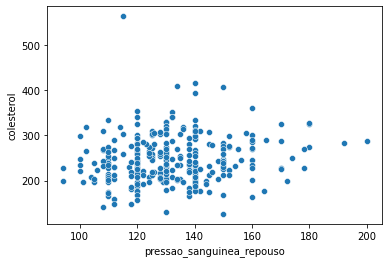

In [28]:
import seaborn as sns

sns.scatterplot(x= "pressao_sanguinea_repouso", y = "colesterol",
               data=colesterol)

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=9)

In [33]:
colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         303 non-null    int64  
 1   genero                        303 non-null    int64  
 2   tipo_dor_peito                303 non-null    int64  
 3   pressao_sanguinea_repouso     303 non-null    int64  
 4   acucar_jejum                  303 non-null    int64  
 5   resultado_eletrocardio        303 non-null    int64  
 6   freq_cardio_max               303 non-null    int64  
 7   angina_exercicio              303 non-null    int64  
 8   depressao_induzida_exercicio  303 non-null    float64
 9   inclinacao                    303 non-null    int64  
 10  num_princ_vasos               303 non-null    object 
 11  thal                          303 non-null    object 
 12  diag_doenca_cardiaca          303 non-null    int64  
 13  coles

In [34]:
x = colesterol.select_dtypes("int64")

In [35]:
kmeans.fit(x)

KMeans(n_clusters=2, random_state=9)

In [37]:
kmeans.labels_

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,

<AxesSubplot:xlabel='pressao_sanguinea_repouso', ylabel='colesterol'>

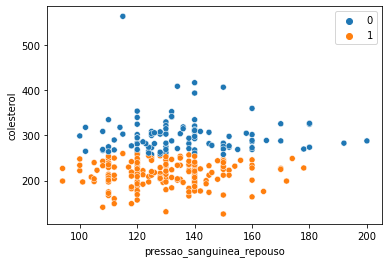

In [38]:
sns.scatterplot(x= "pressao_sanguinea_repouso", y = "colesterol",
               data=colesterol, hue=kmeans.labels_)

In [39]:
colesterol["clusters"] = kmeans.labels_
colesterol.head()

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol,clusters
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233,1
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286,0
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229,1
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250,1
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204,1


In [41]:
colesterol.groupby("clusters")["colesterol"].mean()

clusters
0    298.963964
1    216.473958
Name: colesterol, dtype: float64